In [249]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


--------- Quadratic Example -----------

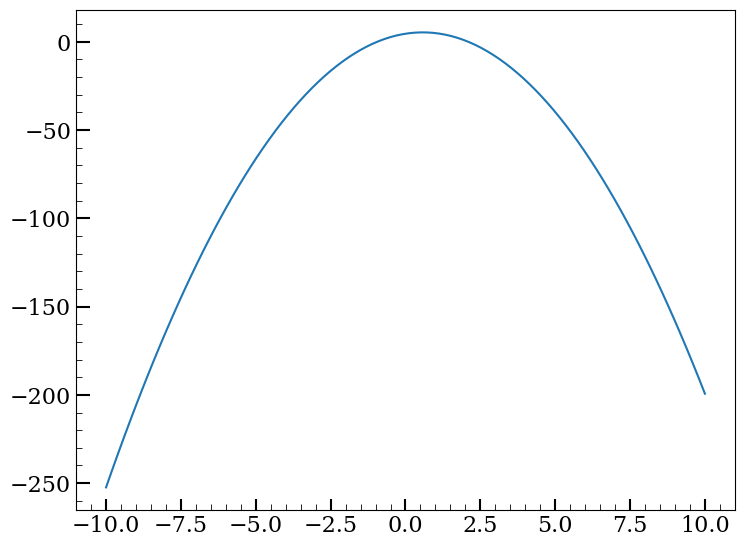

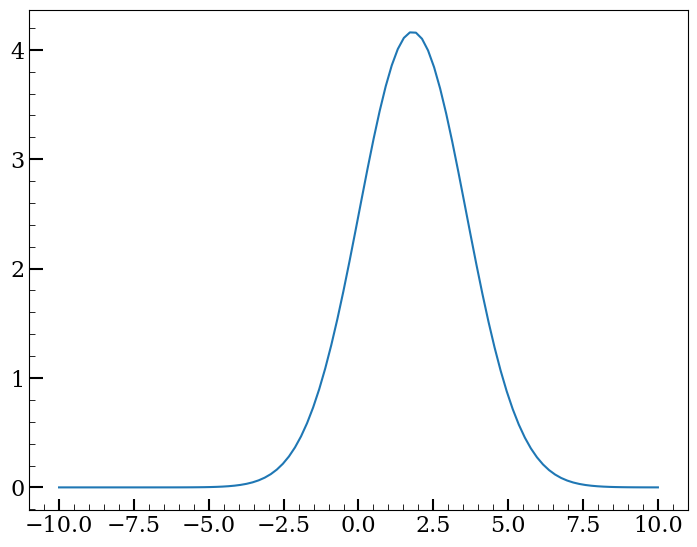

In [250]:
def gaussian_function(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))


def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

# def data_generator(function, x_range, num_points, **kwargs):
#     x = np.linspace(x_range[0], x_range[1], num_points)
#     y = function(x, **kwargs)
#     return x, y

def data_generator_quadratic():
    x = np.linspace(-10, 10, 100)


    a, b, c = np.random.uniform(-5, 5, size=3)
    fun = quadratic_function(x, a, b, c)


    return (x, np.asarray(fun)), [a, b, c]


def data_generator_gaussian():
    x = np.linspace(-10, 10, 100)

    a, b, c = np.random.uniform(0.1, 5, size=3)
    fun = gaussian_function(x, a, b, c)

    return (x, np.asarray(fun)), [a, b, c]


x, default = data_generator_quadratic()
x_gaus, default_gaus = data_generator_gaussian()

plt.plot(x[0], x[1])
plt.show()
plt.plot(x_gaus[0], x_gaus[1])
plt.show()

In [251]:
default_args = {
    'allowed_symbols': "pow,add,sub,mul,aq,constant,variable",
    'epsilon': 10**(-4),
    'objectives': ['r2', 'length'],
    'max_evaluations': 100000000,
    'max_length': 100,
    'max_time': 1800,
    'n_threads': 10
}

name = "Quadratic Function Problem"

train, default_coeff_train = data_generator_quadratic()
test, default_coeff_test = data_generator_quadratic()


In [252]:
from main import Problem
Problem_ = Problem(name, train, test, default_args)

<Axes: title={'center': 'Quadratic Function Problem train'}, xlabel='X-axis', ylabel='Y-axis'>

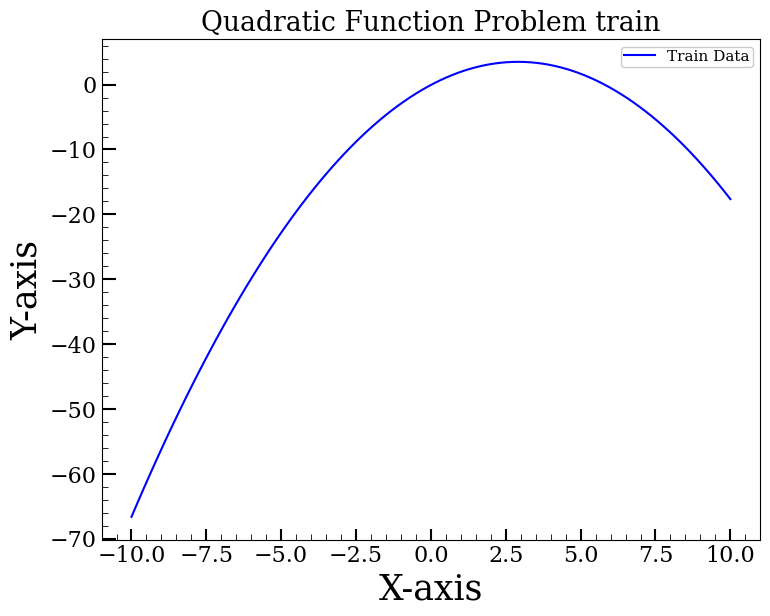

In [253]:
Problem_.plot_data(train=True)

In [254]:
Problem_.solve()

dict_keys(['model', 'variables', 'length', 'complexity', 'tree', 'objective_values', 'mean_squared_error', 'minimum_description_length', 'bayesian_information_criterion', 'akaike_information_criterion']) <class 'dict'>
[-0.5545825958251953, 5.0], 8310.23, ((-14.362365722656) + ((-3.505510330200) * ((-0.698820233345) * X1))), 163.91
[-0.9164524078369141, 7.0], 1660.34, ((-0.258538842201) + ((-5.240432262421) * (0.693147182465 ^ (0.721284925938 * X1)))), 30.74
[-0.9999994039535522, 9.0], 128.36, ((-0.034006144851) + ((-1.442394733429) * ((((-0.222400516272) * X1) + 1.292164206505) * ((-1.313444375992) * X1)))), 0.00
[-1.0, 11.0], 137.91, ((-0.635788083076) + ((-1.204932451248) * ((((-1.571157097816) * X1) - 0.364813596010) * (((-0.222400516272) * X1) + 1.345489621162)))), 0.00


<Axes: title={'center': 'Quadratic Function Problem: solution 3 Train'}>

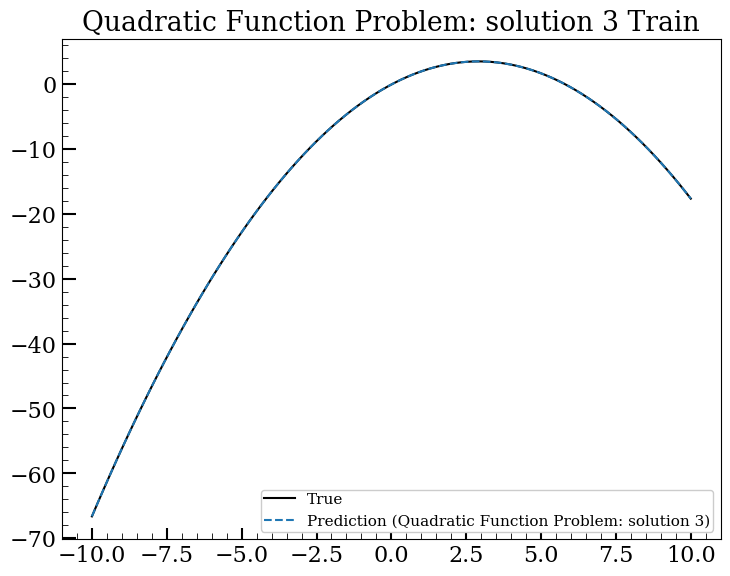

In [255]:
Problem_.solutions[-1].plot_results()

In [256]:
Problem_.solutions[-1].display_expression(), Problem_.solutions[-1].extract_and_format()

<IPython.core.display.Math object>

(None,
 ('X1*b1 + X1**b3*b2 + b0',
  {'b0': -0.04434348653354814,
   'b1': 2.4494358917965737,
   'b2': -0.4210349070865999,
   'b3': 2.0},
  X1*b1 + X1**b3*b2 + b0))

<Axes: title={'center': 'Quadratic Function Problem - Length vs MSE'}, xlabel='Minimal Description Length (MDL)', ylabel='MSE'>

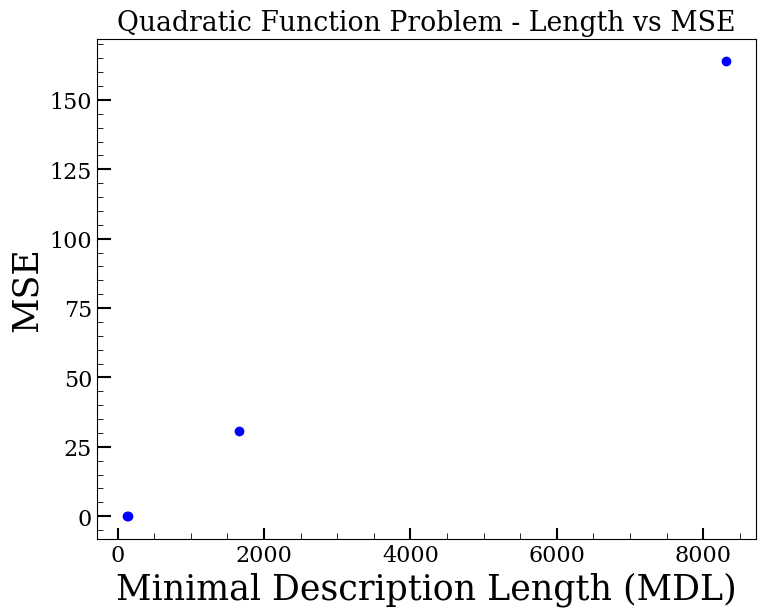

In [257]:
Problem_.plot_mdl_vs_mse()

-------- Gaussian Example ----------

In [258]:
name_g = "Gaussian Function Problem"

gaussian_args = {
    'allowed_symbols': "add,sub,mul,aq,constant,variable,exp",
    'epsilon': 10**(-4),
    'objectives': ['r2', 'length'],
    'max_evaluations': 100000000,
    'max_length': 100,
    'max_time': 1800,
    'n_threads': 10
}


train_g, default_coeff_train_g = data_generator_gaussian()
test_g, default_coeff_test_g = data_generator_gaussian()

Problem_g = Problem(name_g, train_g, test_g, gaussian_args)

<Axes: title={'center': 'Gaussian Function Problem train'}, xlabel='X-axis', ylabel='Y-axis'>

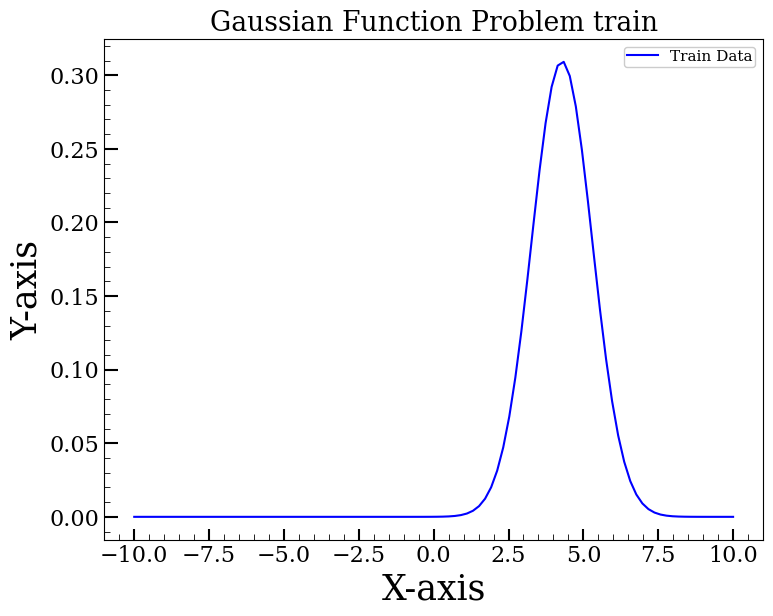

In [259]:
Problem_g.plot_data(train=True)

In [260]:
Problem_g.solve()

dict_keys(['model', 'variables', 'length', 'complexity', 'tree', 'objective_values', 'mean_squared_error', 'minimum_description_length', 'bayesian_information_criterion', 'akaike_information_criterion']) <class 'dict'>
[-0.11643707752227783, 5.0], 100.26, (0.038851760328 + ((-0.024013208225) * ((-0.203849941492) * X1))), 0.01
[-0.13393808901309967, 6.0], 103.42, (0.100314542651 + ((-0.054123792797) * exp(((-0.087573155761) * X1)))), 0.01
[-0.2387036830186844, 7.0], 107.67, (0.038851760328 + (0.056060146540 * ((0.563483953476 * X1) / (sqrt(1 + (0.689034461975 * X1) ^ 2))))), 0.01
[-0.2998673617839813, 8.0], 111.44, (0.078369602561 + (0.009842618369 * ((1.329198479652 * X1) - exp((0.323671966791 * X1))))), 0.00
[-0.9102059602737427, 9.0], 116.70, ((-0.009696268477) + (0.037228956819 * exp(((1.382619738579 * X1) - exp((0.323671966791 * X1)))))), 0.00
[-0.9933034181594849, 10.0], 112.48, ((-0.005169906653) + (0.000339604710 * exp((6.878223896027 / (sqrt(1 + (1.924488186836 + ((-0.450685113

<Axes: title={'center': 'Gaussian Function Problem - Length vs MSE'}, xlabel='Minimal Description Length (MDL)', ylabel='MSE'>

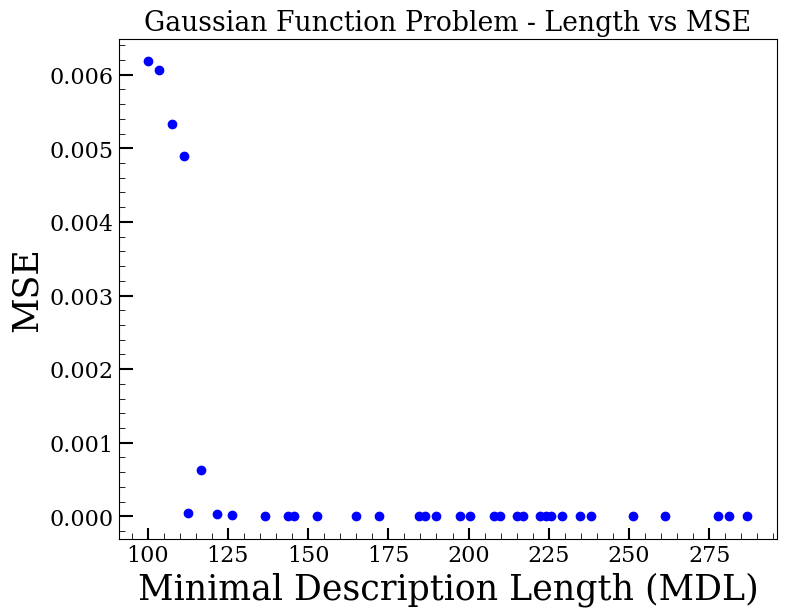

In [261]:
Problem_g.plot_mdl_vs_mse()

<IPython.core.display.Math object>

<Axes: title={'center': 'Gaussian Function Problem: solution 4 Train'}>

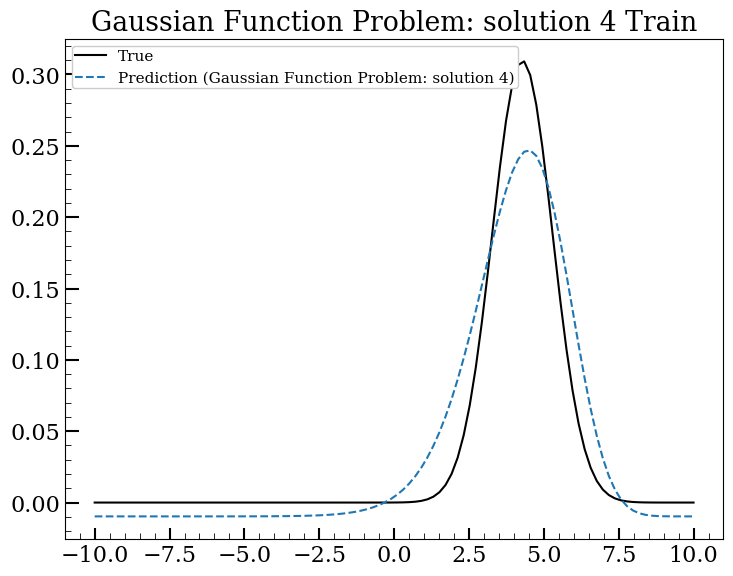

In [262]:
n=4
Problem_g.solutions[n].display_expression(), Problem_g.solutions[n].extract_and_format()
Problem_g.solutions[n].plot_results()